
# Analyse d'un fichier csv sur les films netflix 
### Analyse faite essentiellement avec la librairie pandas et avec l'aide de missingno et matplotlib 

In [35]:
#importer pandas pour l'utilisation des données contenu dans un .csv
import pandas
#importer IPython.display pour pouvoir montrer les 5 premières et dernières lignes du dataframe 
from IPython.display import display
#importer missingo pour afficher un graphique des données manquantes dans le dataframe
import missingno as msno
#importer matplotlib pour les graphiques
import matplotlib.pyplot as plt

netflix_data= pandas.read_csv(r"netflix_titles.csv")



## Quelques infos sur la structure du dataframe

In [36]:
#Affichage des 5 premieres et dernieres oeuvres 
display(netflix_data.head())
display(netflix_data.tail())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [37]:
#avoir les infos du dataframe ( type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.)
print("informations sur le dataframe  : ")
netflix_data.info()

informations sur le dataframe  : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
#avoir les dimensions du dataframe
dimension = netflix_data.shape
print("Dimensionnalité du DataFrame :", dimension)
print(" ------------------------------------------------ ")

#afficher les colonnes du dataframe
colonnes = netflix_data.columns
print("Colonnes du DataFrame :", colonnes)
print("------------------------------------------------ ")

# Afficher les types de données des différentes colonnes du DataFrame
types_de_donnees = netflix_data.dtypes
print("Types de données des différentes colonnes du DataFrame :\n", types_de_donnees)

Dimensionnalité du DataFrame : (8807, 12)
 ------------------------------------------------ 
Colonnes du DataFrame : Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
------------------------------------------------ 
Types de données des différentes colonnes du DataFrame :
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


### Il y a 12 viariable pour 8807 observation 

#### données quantitatives : show_id , date_added , realease_year , duration .
#### données qualitatives : type , title , director , cast , country , rating , listed_in , description .


Il y a 4.075356723818175% de données manquantes dans le DataFrame.
interface graphique illustrant les données manquantes : 


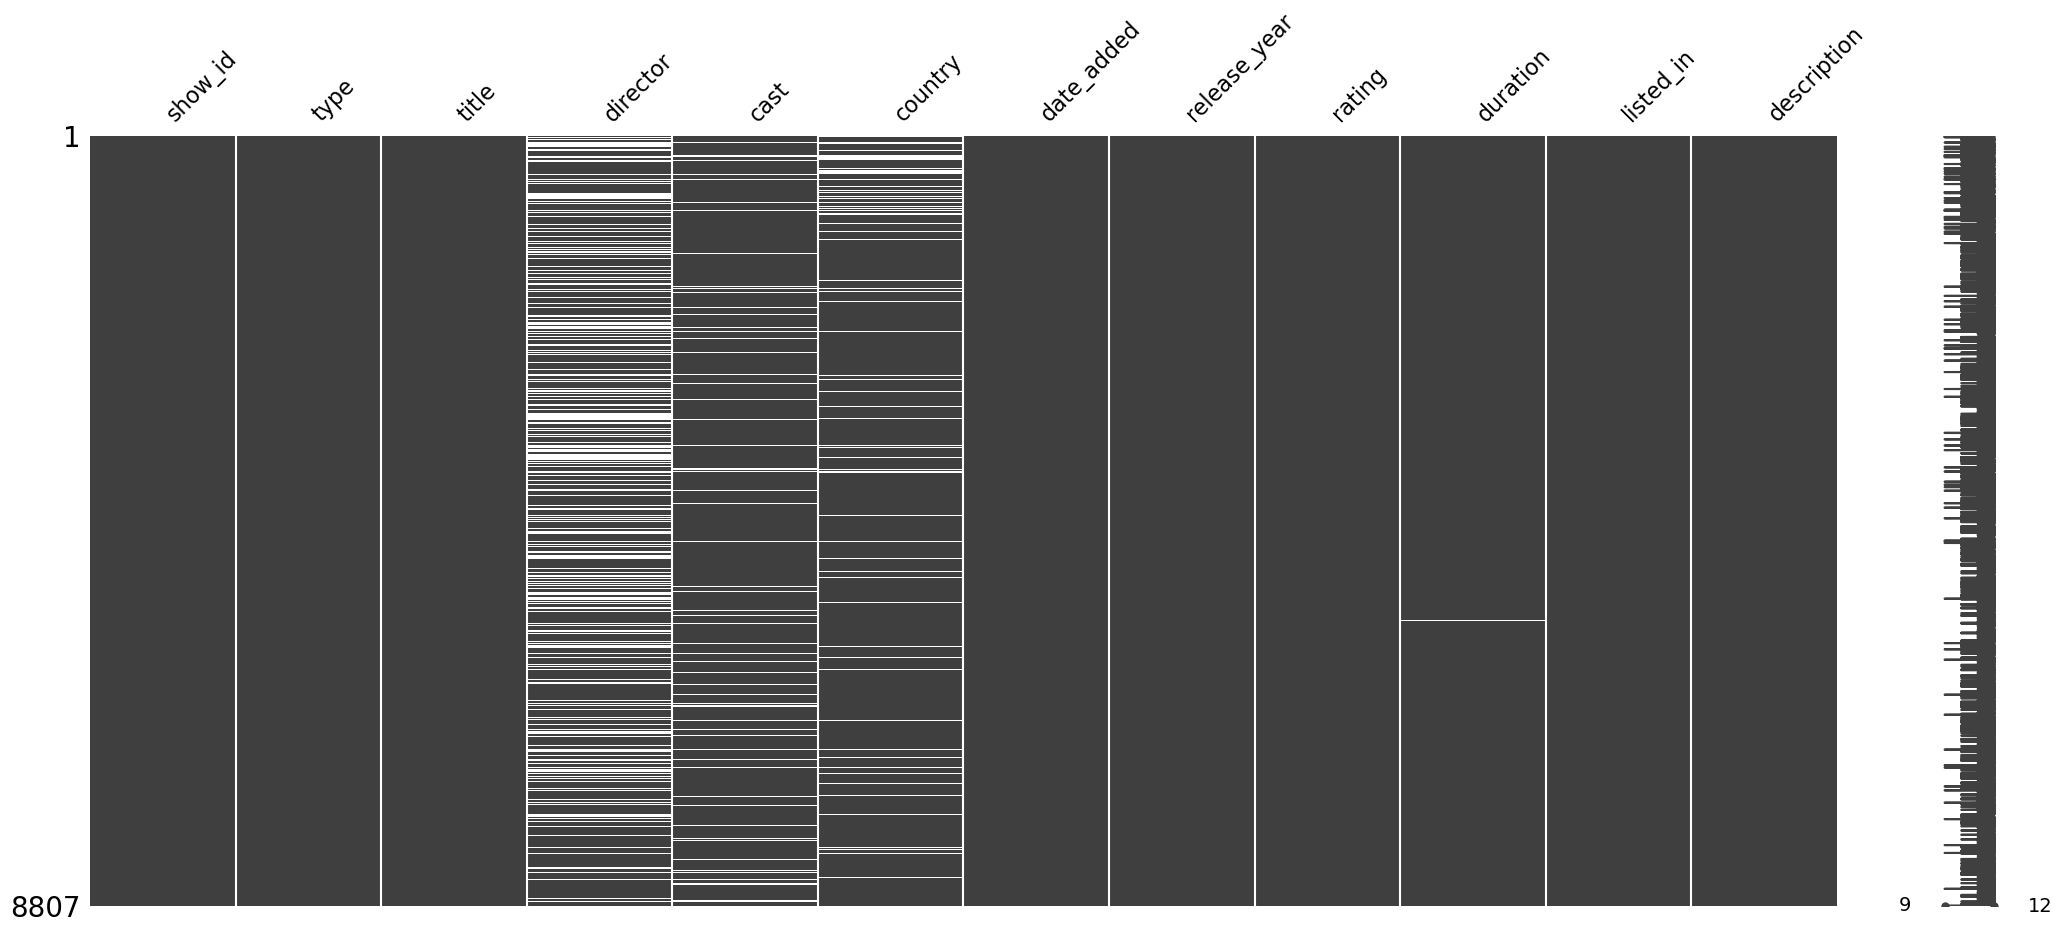

In [39]:
# Vérifier s'il y a des données manquantes dans le DataFrame
donnees_manquantes = netflix_data.isnull().any().any()

if donnees_manquantes:
    # Calculer la proportion en pourcentage de données manquantes dans le DataFrame
    proportion_donnees_manquantes = (netflix_data.isnull().sum().sum() / netflix_data.size) * 100
    print(f"Il y a {proportion_donnees_manquantes}% de données manquantes dans le DataFrame.")
    print("interface graphique illustrant les données manquantes : ")
    msno.matrix(netflix_data)
else:
    print("Il n'y a pas de données manquantes dans le DataFrame.")



In [59]:
# Afficher une observation aléatoire
print("une observation aléatoire : ")
print(netflix_data.sample())


une observation aléatoire : 
     show_id   type             title      director  \
6712   s6713  Movie  Every Time I Die  Robi Michael   

                                                   cast        country  \
6712  Drew Fonteiro, Marc Menchaca, Michelle Macedo,...  United States   

     date_added  release_year rating duration  \
6712 2020-02-25          2019  TV-MA   98 min   

                                  listed_in  \
6712  Dramas, Independent Movies, Thrillers   

                                            description  films_par_an  
6712  After a paramedic’s violent death during a wee...           NaN  


In [61]:
print("toutes les series : ")
display(netflix_data[netflix_data['type']=='TV Show'])

toutes les series : 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,films_par_an
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0


In [64]:
#afficher les donnée où la colonne " title" correspaond a "Catch Me If You Can"
print("film avec comme titre : Catch Me If You Can")
display(netflix_data[netflix_data["title"] == "Catch Me If You Can"])

#filtrer en ayant seulement les films
film= netflix_data[netflix_data["type"]=="Movie"]

# Trier la Dataframe par la colonne "release_year" dans l'ordre décroissant
film_recent = film.sort_values(by='release_year', ascending=False)

# Afficher le nom du film le plus récent
print("---------------------------------------------------------")
display("Le film le plus récent est :", film_recent.iloc[0]['title'])


film avec comme titre : Catch Me If You Can


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,film_par_an,films_par_an
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,NaN,NaN


---------------------------------------------------------


'Le film le plus récent est :'

'Dynasty Warriors'

In [65]:

#transformation du type de la colonne " date_added " en type datetime
netflix_data['date_added'] = pandas.to_datetime(netflix_data['date_added'], errors='coerce')

display(netflix_data.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,film_par_an,films_par_an
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,2021.0


In [69]:
#init
netflix_data= pandas.read_csv(r"netflix_titles.csv")
#ça remplace les chaine de caractere compris entre a et z majucscule et miniscule([a-zA-Z]+) par du vide
netflix_data["duration"] = netflix_data["duration"].str.replace(r'[a-zA-Z]+'," ", regex=True)

print("suppressions des éléments de type string : " ) 
display(netflix_data)

suppressions des éléments de type string : 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [70]:
#fonction pour creer une liste ou chaque chaine de caractere sera mis dans une liste
def string_to_list(string):
    return string.split(", ")

# Appliquer la fonction à chaque élément de la colonne "listed_in"
netflix_data["listed_in"] = netflix_data["listed_in"].apply(string_to_list)

print("créaton de listes pour tout les éléments de listed_in")
display(netflix_data)

créaton de listes pour tout les éléments de listed_in


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [63]:
#creation d'une liste avec les differentes variables 
variables= ["type", "country" , "release_year" , "rating" , "listed_in"]
#pour chaque variables , leurs contenus vont etre print
for variable in variables:
    #.unique sert a voir chaque contenu en une fois 
    values = netflix_data[variable].unique()
    print("----------------------------------------------------")
    display(f"variable {variable} : ")
    display(values)

----------------------------------------------------


'variable type : '

array(['Movie', 'TV Show'], dtype=object)

----------------------------------------------------


'variable country : '

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

----------------------------------------------------


'variable release_year : '

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

----------------------------------------------------


'variable rating : '

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

----------------------------------------------------


'variable listed_in : '

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [72]:
#ça prends chaque contenu de la categorie director avec le nombre de fois que c'est écrit
number_director = netflix_data["director"].value_counts()
#on selectionne tout les éléments qui sont écrit minimum une fois
multicreators = number_director[number_director >1]

print("le noms des directors avec leurs nombres d'oeuvre dans l'odre décroissant")
display(multicreators)


le noms des directors avec leurs nombres d'oeuvre dans l'odre décroissant


director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Marcus Raboy                  16
Suhas Kadav                   16
Jay Karas                     14
                              ..
Abhijit Panse                  2
Jose Manuel Colón              2
Rhys Thomas                    2
Rizal Mantovani                2
Nawapol Thamrongrattanarit     2
Name: count, Length: 867, dtype: int64

In [74]:
#init
netflix_data= pandas.read_csv(r"netflix_titles.csv")

# Supprimer les espaces en trop dans la colonne "date_added"
netflix_data["date_added"] = netflix_data["date_added"].str.strip()

# Convertir la colonne "date_added" en datetime en indiquant le format
netflix_data["date_added"] = pandas.to_datetime(netflix_data["date_added"], format='%B %d, %Y')

#selection des films
films = netflix_data[netflix_data["type"]=="Movie"]
#selection des films
series = netflix_data[netflix_data["type"]=="TV Show"]

# Extraire l'année à partir de la colonne "date_added" et la mettre dans une nouvelle colonne "film_par_an"
netflix_data["film_par_an"] = films["date_added"].dt.year
# pareil mais en mettant dans une colonne "films_par_an"
netflix_data["series_par_an"] = series["date_added"].dt.year

# Compter le nombre de films ajoutés chaque année
films_par_annee = netflix_data.groupby("film_par_an").size()


# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print("listes de films et series sortis chaque années sur netflix : ")
display(films_par_annee)
print("------------------------------------------------------")


# Compter le nombre de films ajoutés chaque année
series_par_annee = netflix_data.groupby("series_par_an").size()

# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print(series_par_annee)


listes de films et series sortis chaque années sur netflix : 


film_par_an
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     253
2017.0     839
2018.0    1237
2019.0    1424
2020.0    1284
2021.0     993
dtype: int64

------------------------------------------------------
series_par_an
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
dtype: int64


## question 23 crée avec matplotlib 

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


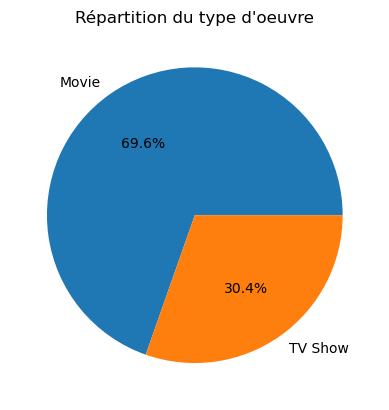

In [49]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["type"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition du type d\'oeuvre')
plt.show()


country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


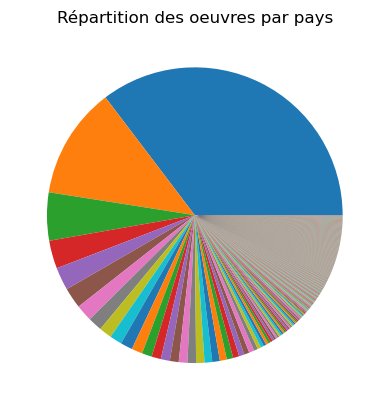

In [50]:
# Compter le nombre d'oeuvres pour chaque pays
counts = netflix_data["country"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('Répartition des oeuvres par pays')
plt.show()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


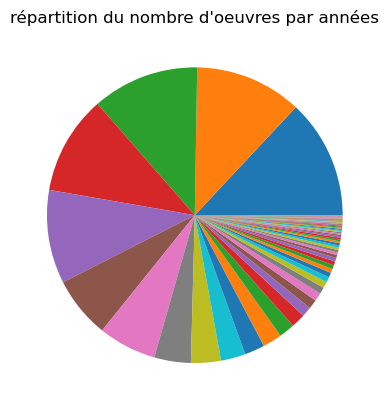

In [75]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["release_year"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('répartition du nombre d\'oeuvres par années')
plt.show()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


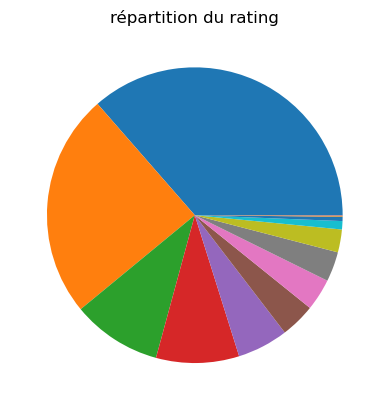

In [56]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["rating"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('répartition du rating')
plt.show()

duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: count, Length: 205, dtype: int64


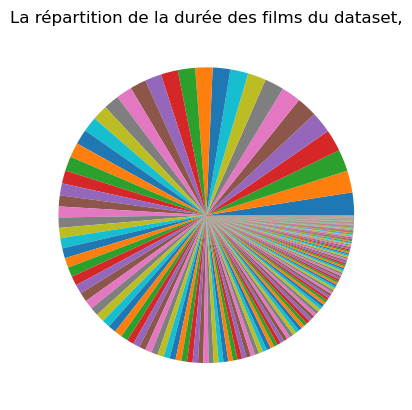

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


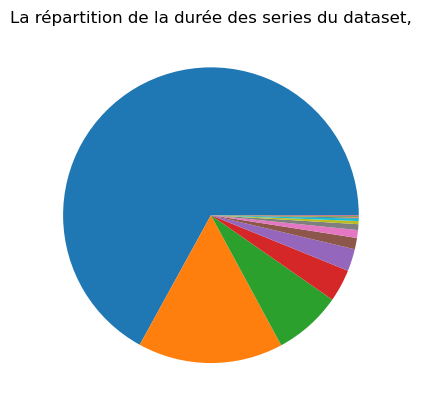

In [77]:
#selection des films
films = netflix_data[netflix_data["type"]=="Movie"]
#selection des films
series = netflix_data[netflix_data["type"]=="TV Show"]

# Compter le nombre d'oeuvres pour chaque type
counts_films = films["duration"].value_counts()
counts_series = series["duration"].value_counts()

# Créer un diagramme 
print(counts_films)
plt.pie(counts_films)
plt.title('La répartition de la durée des films du dataset,')
plt.show()
# Créer un diagramme 
print(counts_series)
plt.pie(counts_series)
plt.title('La répartition de la durée des series du dataset,')
plt.show()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64


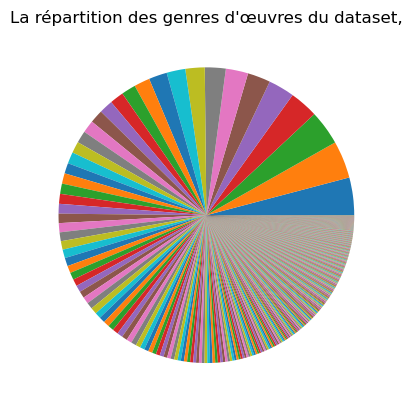

In [78]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["listed_in"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('La répartition des genres d\'œuvres du dataset,')
plt.show()

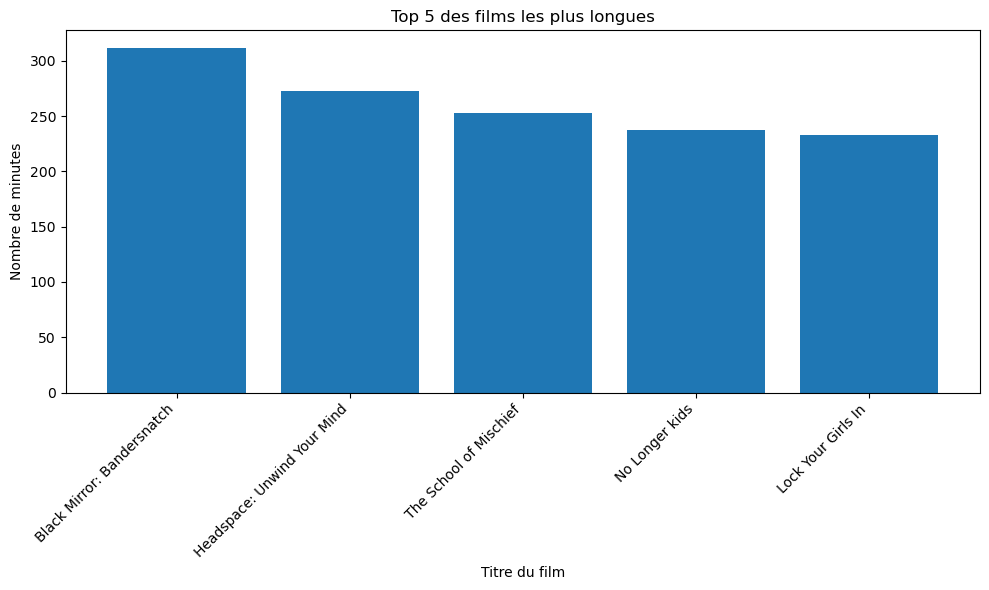

In [80]:
netflix_data= pandas.read_csv(r"netflix_titles.csv")
# Extraire les nombres de la colonne "duration"
netflix_data["duration"] = netflix_data["duration"].str.extract('(\d+)').astype(float)

# Trier les séries par durée (en ordre décroissant)
top_films = netflix_data[netflix_data["type"] == "Movie"].sort_values(by="duration", ascending=False).head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(top_films["title"], top_films["duration"])
plt.xlabel('Titre du film')
plt.ylabel('Nombre de minutes')
plt.title('Top 5 des films les plus longues')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter la superposition
plt.show()


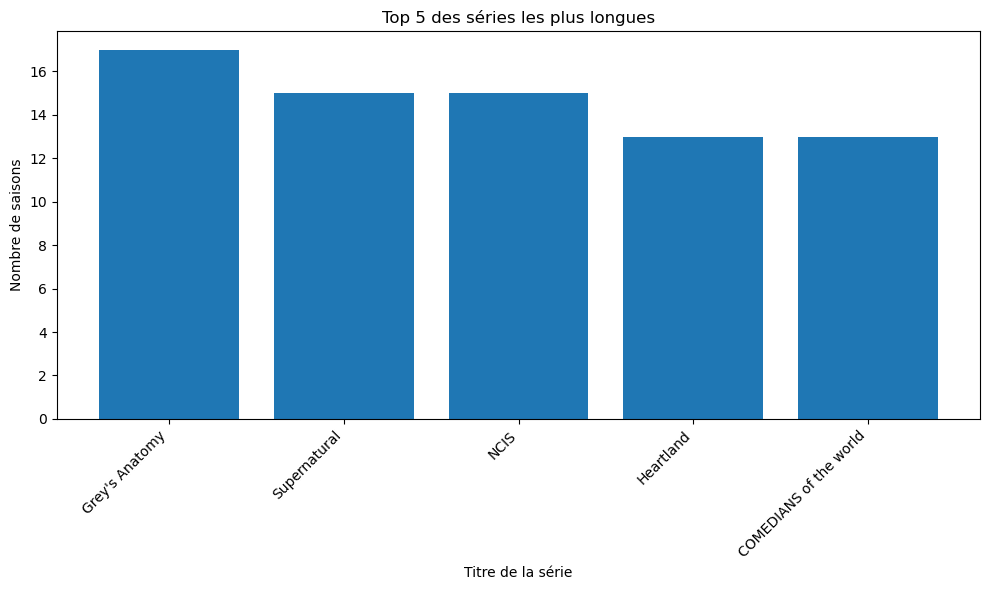

In [82]:
netflix_data= pandas.read_csv(r"netflix_titles.csv")
# Extraire les nombres de la colonne "duration"
netflix_data["duration"] = netflix_data["duration"].str.extract('(\d+)').astype(float)

# Trier les séries par durée (en ordre décroissant)
top_films = netflix_data[netflix_data["type"] == "TV Show"].sort_values(by="duration", ascending=False).head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(top_films["title"], top_films["duration"])
plt.xlabel('Titre de la série')
plt.ylabel('Nombre de saisons')
plt.title('Top 5 des séries les plus longues')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter la superposition
plt.show()


director
Thierry Donard                    5
Florent Bodin                     2
Jean-Patrick Benes                1
Benjamin Weill                    1
Julien Rambaldi                   1
                                 ..
Jean-Claude Flamand-Barny         1
Yacine Belhousse                  1
Christophe Charrier               1
Grand Corps Malade, Mehdi Idir    1
Laurent Cantet                    1
Name: count, Length: 76, dtype: int64


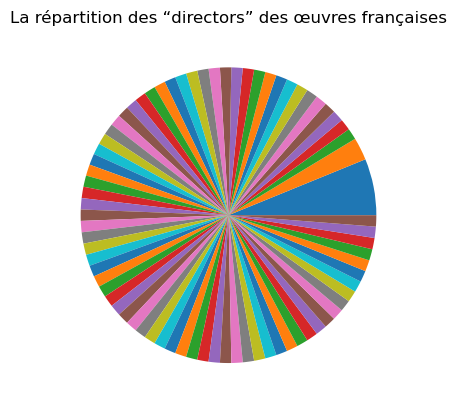

In [84]:
oeuvres_francais = netflix_data[netflix_data["country"]=="France"]

directeur_francais = oeuvres_francais["director"].value_counts()


# Créer un diagramme 
print(directeur_francais)
plt.pie(directeur_francais)
plt.title('La répartition des “directors” des œuvres françaises')
plt.show()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64


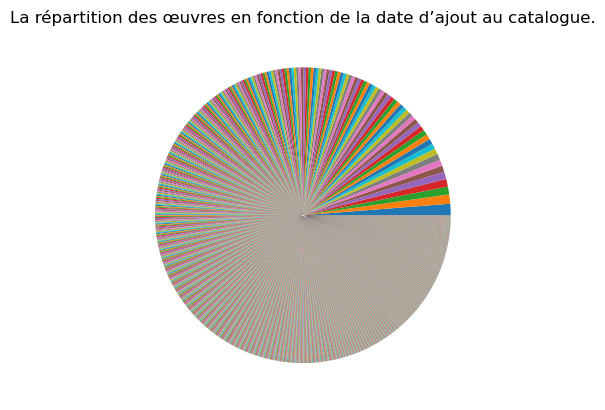

In [85]:


oeuvre_par_date = netflix_data["date_added"].value_counts()


# Créer un diagramme 
print(oeuvre_par_date)
plt.pie(oeuvre_par_date)
plt.title('La répartition des œuvres en fonction de la date d’ajout au catalogue.')
plt.show()